# Roughly how far will H diffuse in an olivine block?
The pynams function fast_vs_slow provides a quick general idea of the simultaneous progress of both the proton-polaron (PP) and proton-vacancy (PV) bulk H diffusion mechanisms in olivine. It assumes no interaction at all between the two mechanisms, which is maybe wrong (Thoraval & Demouchy 2014) but it's fast and will give you a general idea. 

First import pynams and diffusivity_library, which contains all the relavant activation energies and D0 terms. 

In [30]:
from pynams import pynams
from pynams import diffusivity_library as dlib
%matplotlib inline 

Here are the samples and dimensions (in microns) of the 6 olivine blocks in Table 1 of Demouchy et al. 2016

In [3]:
SD1 = pynams.Sample(twoA_list=[1060.], twoB_list=[2060.], twoC_list=[1740.])
SD2 = pynams.Sample(twoA_list=[1060.], twoB_list=[2080.], twoC_list=[1770.])
SD3 = pynams.Sample(twoA_list=[1060.], twoB_list=[2020.], twoC_list=[1730.])
SD5 = pynams.Sample(twoA_list=[1010.], twoB_list=[1090.], twoC_list=[2090.])
SD6 = pynams.Sample(twoA_list=[1040.], twoB_list=[1180.], twoC_list=[2040.])
SD7 = pynams.Sample(twoA_list=[1710.], twoB_list=[2040.], twoC_list=[1040.])

The function fast_vs_slow requires the temperature in celsius, the sample (which includes all 3 dimensions, as above) and the time in minutes.  

It returns the figure (which is what you can resize and/or save) and the 3 axes of the different subplotss (which is what you use if you want to plot more stuff).

Here's the first sample from Demouchy et al.'s table:

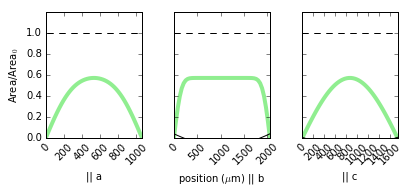

In [4]:
figure, axes = dlib.fast_vs_slow(celsius=1093., sample=SD1, minutes=60.*5, printout=False)

The green is the slower pv mechanism.  

All of these profiles are non-path-integrated, meaning this is what you would expect to see if you could cut the sample open and take a perfect set of measurements through the center exactly parallel to each axis.

If you want to see when the pp mechanism saturates, shorten the time.  

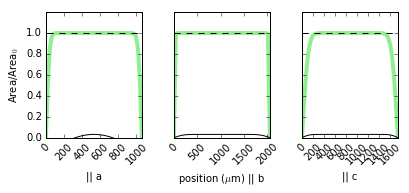

In [8]:
figure, axes = dlib.fast_vs_slow(celsius=1093., sample=SD1, minutes=5., printout=False)

Hydration looks the same just flipped vertically. Note that this is just to compare relative progress. In real olivine, the pp mechanism (black) saturates at some lower-than-true-solubility, and as a result the pv mechanism (thick green) is squished upward. 

Here for Demouchy et al's 2nd sample, I'm having it print out the actual diffusitivies in order || a, || b, and || c.

slower proton-vacancy pv mechanism diffusivities
log10 D at  905.0 C:  -13.9  in m2/s
log10 D at  905.0 C:  -14.1  in m2/s
log10 D at  905.0 C:  -12.8  in m2/s

faster proton-polaron pp mechanism diffusivites
log10 D at  905.0 C:  -10.1  in m2/s
log10 D at  905.0 C:  -11.5  in m2/s
log10 D at  905.0 C:  -11.4  in m2/s


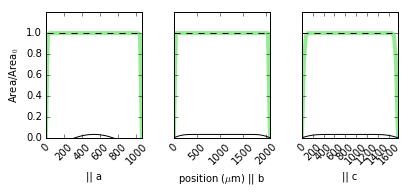

In [15]:
figure, axes = dlib.fast_vs_slow(celsius=905., sample=SD2, minutes=60.*1, printout=True)

The other Demouchy et al. sample at 900C has progressed a little bit further but not much. Demouchy et al. see more movement || a (their Fig. 4; don't be confused by the IR polarization || c) that I would expect based on the lower pressure experiments used to calculate these curves. 

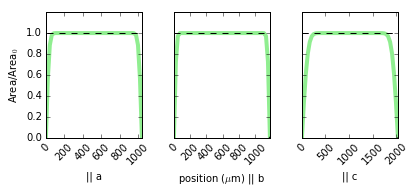

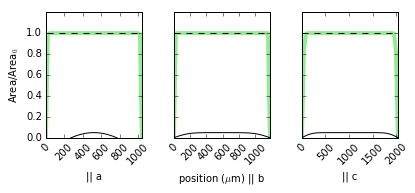

In [28]:
figure, axes = dlib.fast_vs_slow(celsius=900., sample=SD6, minutes=60.*10., printout=False) # The actual experiment is first
figure, axes = dlib.fast_vs_slow(celsius=900., sample=SD6, minutes=60.*1., printout=False) # When pp saturates is second

Demouchy et al.'s SD2-274 experiment is very similar to my San Carlos olivine sample SC1-2, which I hydrated at 800C for 17.5 hours, and which also went a little faster than I was expecting (it's very homogeneous; I don't see much change at the edge at all). That sample, shown below, has multiple entries in the lists because I measured the thickness multiple times.

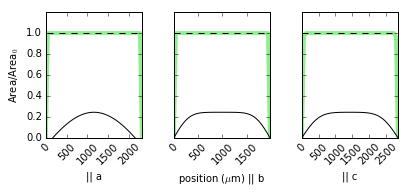

In [22]:
SC1_2 = pynams.Sample(twoA_list=[2310., 2292., 2319., 2309., 2318.],
                      twoB_list=[1963., 1987., 1976., 1987., 1980.],
                      twoC_list=[2858., 2864., 2858., 2863., 2864.])
figure, axes = dlib.fast_vs_slow(celsius=800., sample=SC1_2, minutes=60.*17.5, printout=False)

The two Demouchy et al. samples at 1200C should be fully saturated. Sometimes the error function that I'm using to calculate the diffusion profiles does crazy things at the very end. The upward curvature is a bug in my code, not a real profile, and should be interpreted as the system having reaching equilibrium.

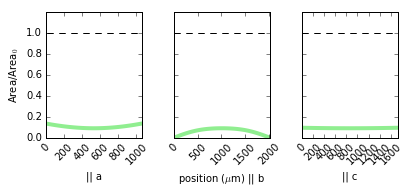

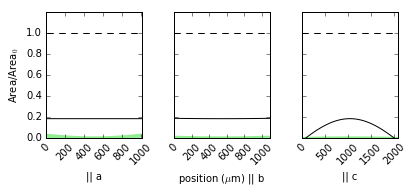

In [25]:
figure, axes = dlib.fast_vs_slow(celsius=1200., sample=SD3, minutes=60.*10., printout=False)
figure, axes = dlib.fast_vs_slow(celsius=1200., sample=SD5, minutes=60.*5., printout=False)

And here's their last sample at 1000C

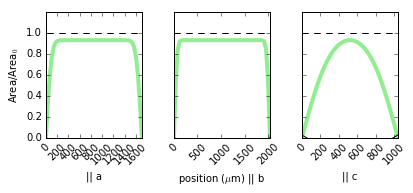

In [31]:
figure, axes = dlib.fast_vs_slow(celsius=1000., sample=SD7, minutes=60.*5., printout=False)